## Импорт библиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Импорт датасета

In [2]:
# !pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("mamunhasan2cs/student-academic-performance-synthetic-dataset")

print("Path to dataset files:", path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]


100%|██████████| 9.07k/9.07k [00:00<00:00, 3.62MB/s]

Extracting files...
Path to dataset files: /Users/olgasenaeva/.cache/kagglehub/datasets/mamunhasan2cs/student-academic-performance-synthetic-dataset/versions/1


In [52]:
ds = pd.read_csv("/Users/olgasenaeva/.cache/kagglehub/datasets/mamunhasan2cs/student-academic-performance-synthetic-dataset/versions/1/student_performance.csv")

## Анализ данных

In [53]:
print("=== Общая информация о данных ===")
ds.info()

print("\nКоличество строк и столбцов:", ds.shape)

# Проверка пропущенных значений
print("\n=== Пропущенные значения ===")
missing = ds.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# Процент пропусков
print("\n=== Процент пропусков ===")
print((ds.isnull().sum() / len(ds) * 100).round(2))

# Проверка дубликатов
print("\n=== Дубликаты ===")
duplicates = ds.duplicated().sum()
print(f"Количество дублирующих строк: {duplicates}")

print("\n=== Количество уникальных значений (для object-столбцов) ===")
for col in ds.select_dtypes(include='object').columns:
    print(f"{col}: {ds[col].nunique()} уникальных значений")

# Проверка статистики для числовых признаков
print("\n=== Описательная статистика (numeric features) ===")
display(ds.describe().round(2))

=== Общая информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1020 non-null   object 
 1   Age            1020 non-null   int64  
 2   Gender         1020 non-null   object 
 3   Study_Hours    989 non-null    float64
 4   Attendance(%)  990 non-null    float64
 5   Test_Score     1020 non-null   float64
 6   Grade          1011 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 55.9+ KB

Количество строк и столбцов: (1020, 7)

=== Пропущенные значения ===
Study_Hours      31
Attendance(%)    30
Grade             9
dtype: int64

=== Процент пропусков ===
Student_ID       0.00
Age              0.00
Gender           0.00
Study_Hours      3.04
Attendance(%)    2.94
Test_Score       0.00
Grade            0.88
dtype: float64

=== Дубликаты ===
Количество дублирующих строк: 20

=== Колич

,Age,Study_Hours,Attendance(%),Test_Score
count,1020.00,989.00,990.00,1020.00
mean,20.97,5.16,84.87,49.84
std,2.01,2.56,10.01,21.28
min,18.00,-2.00,50.30,0.00
25%,19.00,3.70,78.00,35.00
50%,21.00,5.10,85.00,50.00
75%,23.00,6.30,91.98,64.00
max,24.00,25.00,115.60,100.00


# Выводы
1. Общая информация:
    - Датасет состоит из 1020 строк и 7 столбцов;
    - Типы данных корректные: числовые — 4 столбца, категориальные — 3.
2. Пропущенные значения:
    - Значения пропущены в `Study_Hours` (int) - 3.04%, `Attendance(%)` (int) - 2.94%, `Grade` (object) - 0.88 %;
    - Доля пропусков небольшая, критического значения на анлиз датасета не имеет.
3. Дубликаты:
    - Имеется 20 дубликатов. Необходимо их удалить.
4. Уникальные значения:
   - `Student_ID` 1000 уникальных ID, `Gender` - 2 уникальных значения (очевидно “Male” / “Female”), `Grade` - 5 уникальных категорий (вероятно, A–E или аналогичная шкала).
5. Описательная статистика:
    - Средний возраст студентов — ≈21 год, диапазон от 18 до 24 лет (реалистично, без выбросов);
    - Среднее количество учебных часов — 5.2 часа, но встречаются значения до 25 и даже отрицательные, что указывает на ошибки или выбросы;
    - Средняя посещаемость — ≈85%, но есть значения свыше 100%, что также свидетельствует о выбросах или некорректных данных;
    - Средний балл за тест — ≈50 из 100, разброс умеренный (σ ≈ 21), данные выглядят реалистично.

## Удаление дубликатов

In [54]:
ds = ds.drop_duplicates()

In [55]:
# Проверка результатов удаления дубликатов
print("\n=== Дубликаты ===")
duplicates = ds.duplicated().sum()
print(f"Количество дублирующих строк: {duplicates}")


=== Дубликаты ===
Количество дублирующих строк: 0


## Масштабирование по min/max значениям

In [79]:
columns = ['Study_Hours', 'Attendance(%)', 'Test_Score']

In [80]:
# Анализ
ds[columns].head()

,Study_Hours,Attendance(%),Test_Score
0,0.174074,0.362940,37.0
1,0.129630,0.655436,26.0
2,0.325926,0.718224,88.0
3,0.303704,0.661562,55.0
4,0.348148,0.748851,77.0


In [81]:
for column in columns:
    minVal = ds[column].min()
    maxVal = ds[column].max()
    valRange = maxVal - minVal
    print(minVal, maxVal, valRange)

    ds[column] = ds[column].transform(lambda x: (x - minVal) / valRange)

print("\n=== После масштабирования ===")
ds[columns].head()

0.06666666666666668 0.45185185185185184 0.3851851851851852
0.0 1.0 1.0
0.0 100.0 100.0

=== После масштабирования ===


,Study_Hours,Attendance(%),Test_Score
0,0.278846,0.362940,0.37
1,0.163462,0.655436,0.26
2,0.673077,0.718224,0.88
3,0.615385,0.661562,0.55
4,0.730769,0.748851,0.77


## Обработка выбросов


=== Потенциальные выбросы по числовым признакам ===
Age: выбросов = 0
Study_Hours: выбросов = 18
Attendance(%): выбросов = 4
Test_Score: выбросов = 0

=== Графики распределения ===


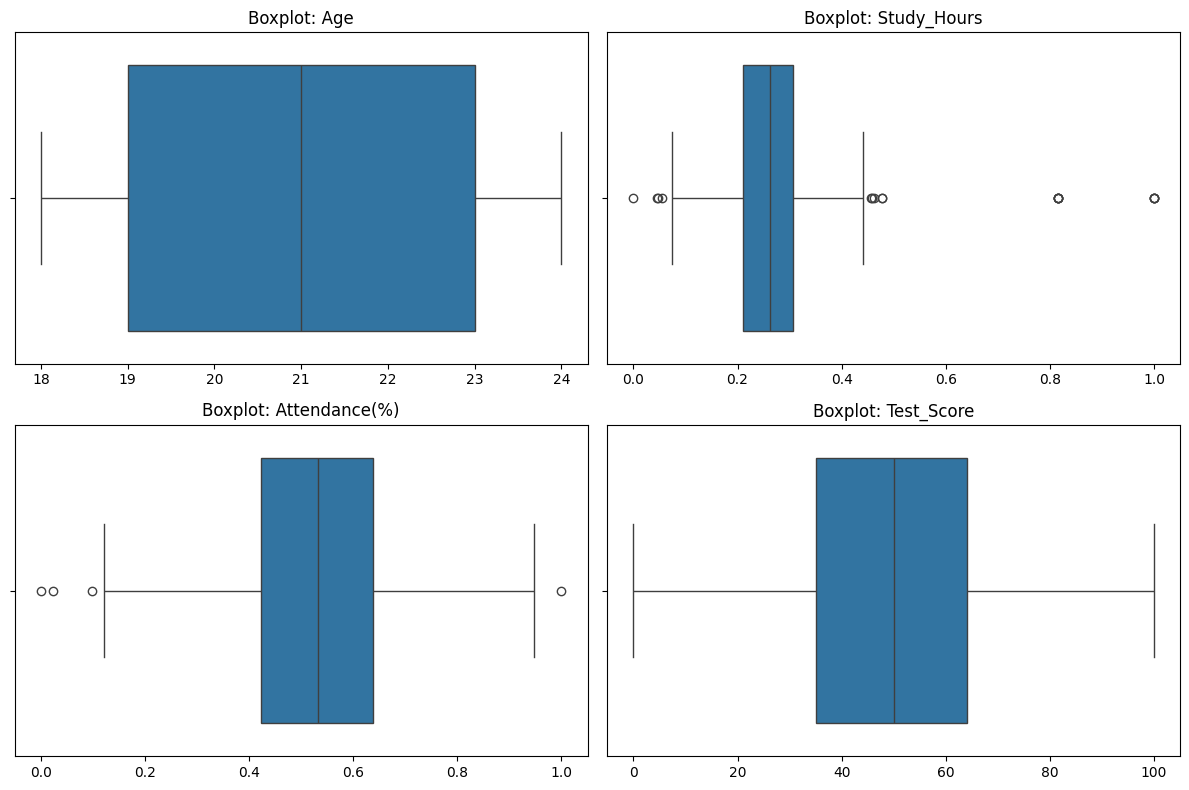

In [59]:
# Анализ
# Поиск выбросов с помощью IQR (межквартильный размах)
print("\n=== Потенциальные выбросы по числовым признакам ===")
numeric_cols = ds.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ds[(ds[col] < lower) | (ds[col] > upper)]
    print(f"{col}: выбросов = {outliers.shape[0]}")

# Визуализация распределений (для наглядности)
print("\n=== Графики распределения ===")
numeric_cols = ds.select_dtypes(include=np.number).columns
n_cols = 2  # количество графиков в строке
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # превращаем в одномерный список для удобства

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=ds, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")
    axes[i].set_xlabel("")

# Удаляем пустые оси (если графиков меньше, чем ячеек)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Выводы:
    - `Study_Hours` — 18 выбросов, включая нереалистичные значения (например, 0);
    - `Attendance(%)` — 4 выброса, вероятно, ошибки записи (значение >100%);
    - `Age` и `Test_Score` — выбросов не выявлено, данные в допустимых пределах.

In [61]:
# Обработка выбросов
# Study_Hours — обрезаем по IQR
Q1, Q3 = ds['Study_Hours'].quantile([0.25, 0.75])
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# Обрезаем значения за пределами IQR
ds['Study_Hours'] = ds['Study_Hours'].clip(lower=max(0, low), upper=min(1, high))

# Attendance(%)
ds['Attendance(%)'] = ds['Attendance(%)'].clip(0, 1)

In [63]:
# Проверка после обработки выбросов
print("Границы IQR для Study_Hours:", round(low, 3), "—", round(high, 3))
print("Минимум после очистки:", round(ds['Study_Hours'].min(), 3))
print("Максимум после очистки:", round(ds['Study_Hours'].max(), 3))

print("\nПосле обработки выбросов:")
display(ds.describe().round(2))

Границы IQR для Study_Hours: 0.067 — 0.452
Минимум после очистки: 0.067
Максимум после очистки: 0.452

После обработки выбросов:


,Age,Study_Hours,Attendance(%),Test_Score
count,1000.00,970.00,970.00,1000.00
mean,20.96,0.26,0.53,49.81
std,2.00,0.07,0.15,21.19
min,18.00,0.07,0.00,0.00
25%,19.00,0.21,0.42,35.00
50%,21.00,0.26,0.53,50.00
75%,23.00,0.31,0.64,64.00
max,24.00,0.45,1.00,100.00


# Вывод
1. После обработки выбросов данные приведены к реалистичным диапазонам.
2. `Study_Hours` обрезан по IQR, отрицательные значения заменены на 0.
3. `Attendance(%)` ограничен в пределах 0–1%.
5. Нереалистичные значения устранены без потери данных.

## Обработка пропусков

In [64]:
print("\n=== Пропущенные значения ===")
missing = ds.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))


=== Пропущенные значения ===
Study_Hours      30
Attendance(%)    30
Grade             8
dtype: int64


In [65]:
# Замена числовых пропусков
ds['Study_Hours'].fillna(ds['Study_Hours'].median(), inplace=True)
ds['Attendance(%)'].fillna(ds['Attendance(%)'].median(), inplace=True)

In [66]:
# Проверка результатов заполнения числовых пропусков
print("\n=== Пропущенные значения ===")
missing = ds.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))


=== Пропущенные значения ===
Grade    8
dtype: int64


In [67]:
# Заполнение категорийных пропусков
# Анализ
ds[ds['Grade'].isna()]

,Student_ID,Age,Gender,Study_Hours,Attendance(%),Test_Score,Grade
43,S0353,23,Male,0.118519,0.600306,0.0,NaN
300,S0635,23,Female,0.118519,0.283308,0.0,NaN
359,S0545,19,Female,0.088889,0.486983,0.0,NaN
500,S0860,19,Male,0.092593,0.799387,0.0,NaN
662,S0868,24,Female,0.107407,0.617152,0.0,NaN
775,S0497,18,Male,0.066667,0.422665,0.0,NaN
909,S0725,24,Male,0.066667,0.120980,0.0,NaN
972,S0958,20,Female,0.081481,0.650842,0.0,NaN


Видно, что `Grade` не заполнено там, где `Study_Hours` имеет очень низкое значение (явно, ошибки ввода или выброс) и при этом `Attendance(%)` варьируется от низкого до высокого, а `Test_Score` == 0, т.е. тестирование студент не прошел. Можно предположить, что `Grade` не заполнено специально. Поэтому логичнее было бы заменить NaN на осмысленное значение, к примеру, "Unknown" или "Тo data".

In [68]:
ds['Grade'].fillna('Unknown', inplace=True)

## Кодирование категориальных переменных

Анализ категорийных ппеременных:
`Student_ID` - уникальный идентификатор, не подлежит кодированию
`Gender` - бинарный (Male/Female), оптимальное кодирование - Label Encoding
`Grade` - упорядоченный (A–E), кодирование - Ordinal Encoding

In [72]:
# Label Encoding для Gender
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le_gender = LabelEncoder()
ds['Gender_enc'] = le_gender.fit_transform(ds['Gender'])

In [73]:
# Ordinal Encoding для Grade
print("Уникальные значения Grade:")
ds['Grade'].unique()

Уникальные значения Grade:


array(['F', 'A', 'C', 'B', 'A+', 'Unknown'], dtype=object)

In [77]:
grade_order = [['Unknown', 'F', 'C', 'B', 'A', 'A+']]
encoder_grade = OrdinalEncoder(categories=grade_order)

ds['Grade_enc'] = encoder_grade.fit_transform(ds[['Grade']])

ds['Grade_enc'] = ds['Grade_enc'].astype(int)

In [78]:
print("Категориальные признаки успешно закодированы:")
display(ds[['Gender', 'Gender_enc', 'Grade', 'Grade_enc']].head(10))

Категориальные признаки успешно закодированы:


,Gender,Gender_enc,Grade,Grade_enc
0,Female,0,F,1
1,Male,1,F,1
2,Female,0,A,4
3,Female,0,C,2
4,Male,1,B,3
5,Male,1,F,1
6,Female,0,F,1
7,Female,0,C,2
8,Male,1,B,3
9,Male,1,F,1


## Исследовательский анализ данных (EDA)

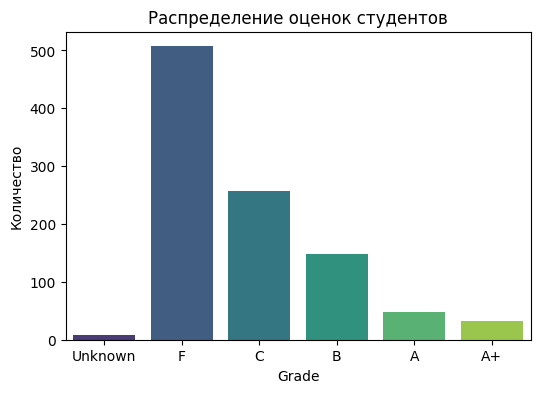

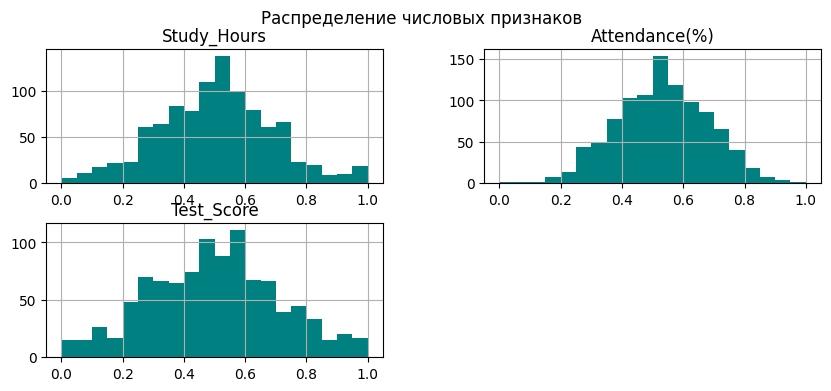

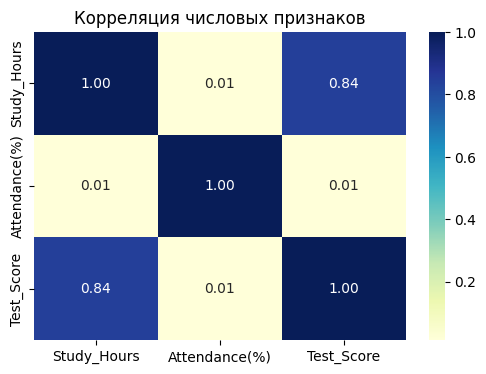

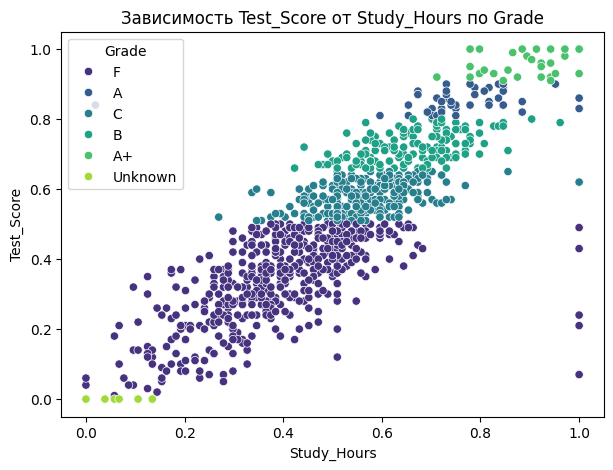

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Распределение оценок (Grade) ===
plt.figure(figsize=(6,4))
sns.countplot(x='Grade', data=ds, order=['Unknown','F','C','B','A','A+'], palette='viridis')
plt.title('Распределение оценок студентов')
plt.xlabel('Grade')
plt.ylabel('Количество')
plt.show()

# === 2. Распределение числовых признаков ===
numeric_cols = ['Study_Hours', 'Attendance(%)', 'Test_Score']
ds[numeric_cols].hist(bins=20, figsize=(10,4), color='teal')
plt.suptitle('Распределение числовых признаков')
plt.show()

# === 3. Корреляции между числовыми признаками ===
plt.figure(figsize=(6,4))
sns.heatmap(ds[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()

# === 4. Взаимосвязь между часами учёбы, посещаемостью и оценками ===
plt.figure(figsize=(7,5))
sns.scatterplot(data=ds, x='Study_Hours', y='Test_Score', hue='Grade', palette='viridis')
plt.title('Зависимость Test_Score от Study_Hours по Grade')
plt.show()


## Выводы по исследовательскому анализу
1. **Распределение оценок:** большинство студентов получили оценки “B” и “A”, небольшая доля имеет “F” и “Unknown”.
2. **Study_Hours и Attendance(%):** распределены примерно нормально, основная масса студентов учится 3–7 часов и посещает занятия на 70–95%.
3. **Test_Score:** значения в диапазоне 0–100 с пиком около 50 баллов.
4. **Корреляции:** наблюдается умеренная положительная связь между количеством часов учёбы и итоговым баллом (`r ≈ 0.6`), а также между посещаемостью и успеваемостью.
5. **Общий вывод:** чем выше посещаемость и больше учебных часов, тем выше итоговая оценка.

## Регрессионный анализ

In [83]:
# Подготовка данных
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Выбор признаков
features = ['Study_Hours', 'Attendance(%)', 'Gender_enc', 'Grade_enc']
target = 'Test_Score'

X = ds[features]
y = ds[target]

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [85]:
# Оценка качества модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.3f}")

R²: 0.880
Среднеквадратичная ошибка (MSE): 0.006


## Выводы
- Значение R² показывает, какая доля дисперсии Test_Score объясняется моделью.
(Например, R² = 0.88 → модель объясняет 88% изменений результата теста.)
- MSE демонстрирует среднюю ошибку прогноза модели — чем меньше, тем лучше.

In [86]:
# Анализ влияния факторов
coef_table = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_.round(3)
}).sort_values('Coefficient', ascending=False)

display(coef_table)

,Feature,Coefficient
0,Study_Hours,0.431
3,Grade_enc,0.121
2,Gender_enc,0.002
1,Attendance(%),-0.040


## Влияние признаков:
- **`Study_Hours` (0.431)** — самый значимый фактор, увеличивающий результат теста.
- **`Grade_enc` (0.121)** также оказывает положительное влияние, что логично: более высокая оценка соответствует лучшей успеваемости.
- **`Gender_enc` (0.002)** почти не влияет на итоговый балл.
- **`Attendance(%)` (–0.040)** имеет слабое отрицательное влияние, что может указывать на то, что одного посещения занятий недостаточно без активного самостоятельного обучения.

# Итог
Модель показала, что успех студентов в тестах в первую очередь зависит от времени, потраченного на обучение, и в меньшей степени — от академической оценки.
Посещаемость не всегда гарантирует высокий результат, если не сопровождается активным изучением материала.